# Predicting Cement Compressive Strength
In this study, we will be predicting cement compressive strength based on its material composition.
We will be using the readily available [Concrete Compressive Strength](https://archive-beta.ics.uci.edu/ml/datasets/concrete+compressive+strength) data set from UCI Machine learning repository.

## About the Dataset
> Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

### Input Features:
1. **Cement** expressed in ($\frac{Kg}{m^3}$)
2. **Blast Furnace Slag** expressed in ($\frac{Kg}{m^3}$)
3. **Fly Ash** expressed in ($\frac{Kg}{m^3}$)
4. **Water** expressed in ($\frac{Kg}{m^3}$)
5. **Superplasticizer** expressed in ($\frac{Kg}{m^3}$)
6. **Coarse Aggregate** expressed in ($\frac{Kg}{m^3}$)
7. **Fine Aggregate** expressed in ($\frac{Kg}{m^3}$)
8. **Age** expressed in days (from 1 to 365)

### Output:
1. *Concrete compressive strength* expressed in Mega-Pascals.

## Previewing the Dataset
The following code snippets below downloads the dataset into the memory, then tabulates the first 5 observations. The next table shows the basic summary statistics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

# Statistical Calculations
from statsmodels.api import qqplot
from scipy.stats import normaltest, zscore

plt.style.use(["science", "notebook"])

In [20]:
DATASET_URI = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

dataset = pd.read_excel(DATASET_URI)

# Replace the Headers for Readability
attributes = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age", "Concrete Compressive Strength"]
dataset.columns = attributes

In [3]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Findings on the Dataset
1. All 9 attributes have no missing data with a total of 1030 observations each.
2. The min and max values of all attributes were highly skewed.
3. Outliers exists on some of the attributes.

## Visualizing the Dataset
The following function below will display the QQ-plot, histogram, and box plot of a selected feature.

In [4]:
def visualize_attribute(attr_index):
  # Current Attribute to be visualized
  cur_attribute = dataset.iloc[:, attr_index]

  # Instanciate Matplotlib Figure
  figure, axes = plt.subplots(1,3)
  figure.set_size_inches(12,4)
  figure.tight_layout()

  # Statistical Calculations (Z-score conversion and normality tests)
  std_cur_attribute = zscore(cur_attribute)

  # Plot the attribute
  qqplot(std_cur_attribute, line='45', ax=axes[0])
  sns.histplot(cur_attribute,ax=axes[1])
  sns.boxplot(cur_attribute,ax=axes[2])


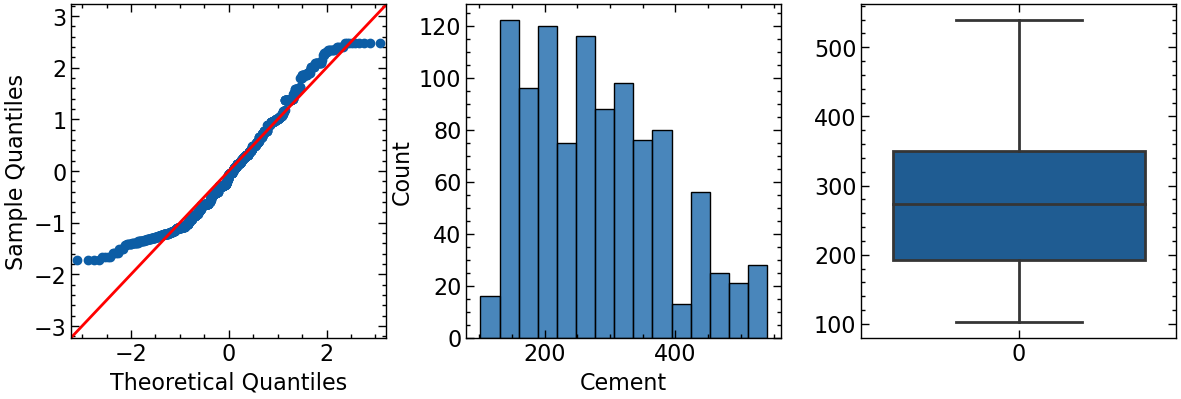

In [5]:
visualize_attribute(attr_index=0)

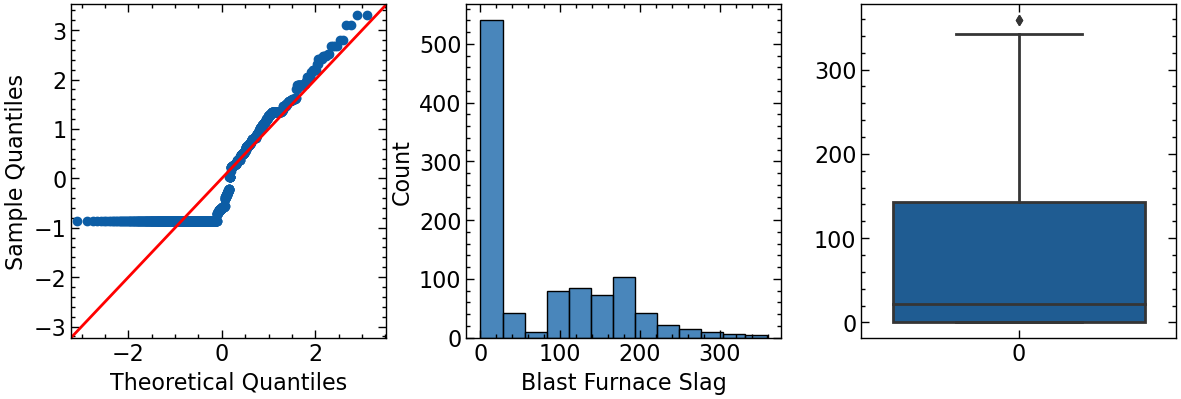

In [6]:
visualize_attribute(attr_index=1)

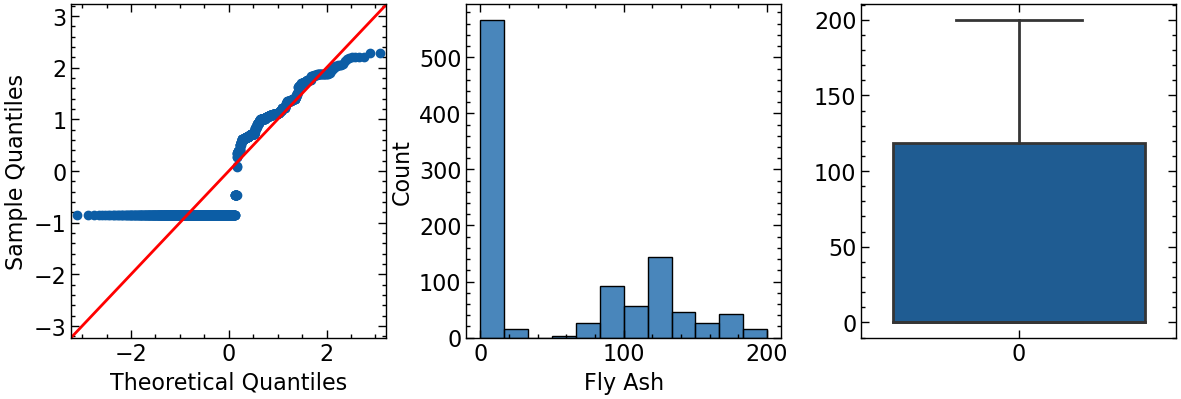

In [7]:
visualize_attribute(attr_index=2)

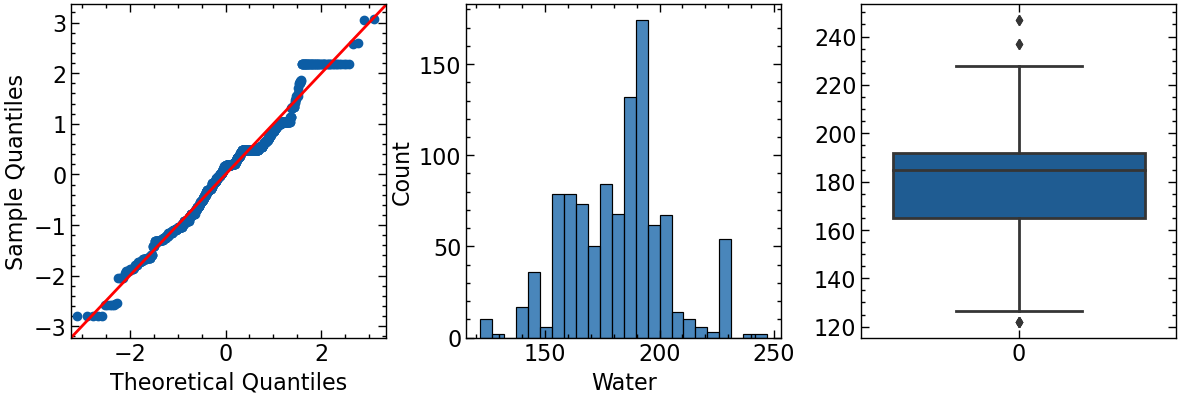

In [8]:
visualize_attribute(attr_index=3)

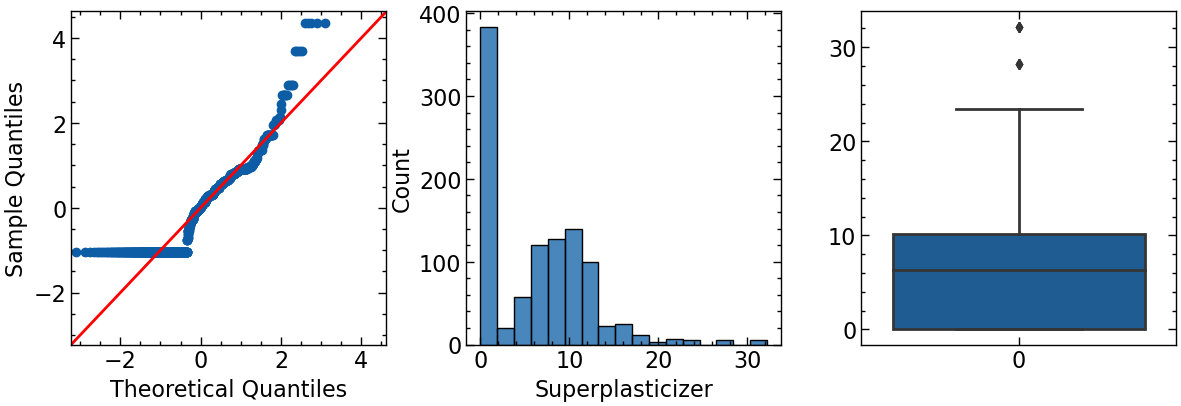

In [9]:
visualize_attribute(attr_index=4)

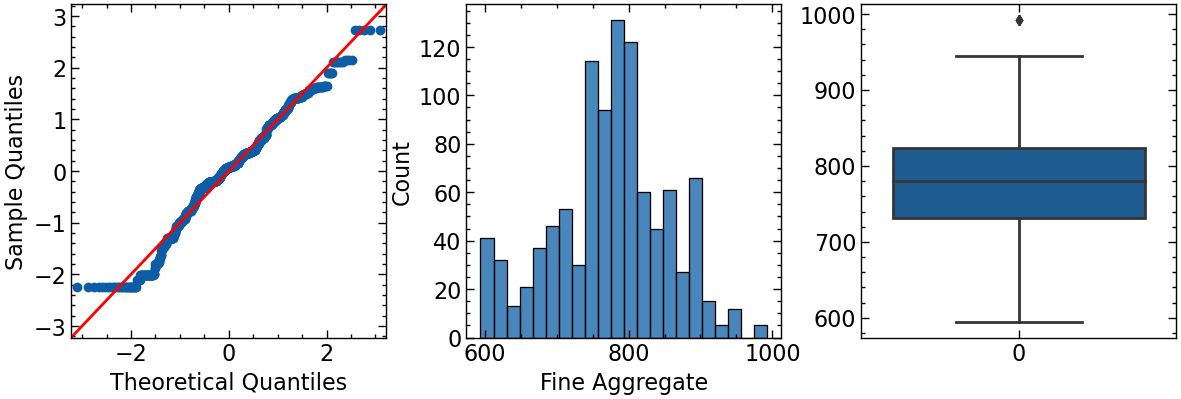

In [10]:
visualize_attribute(attr_index=6)

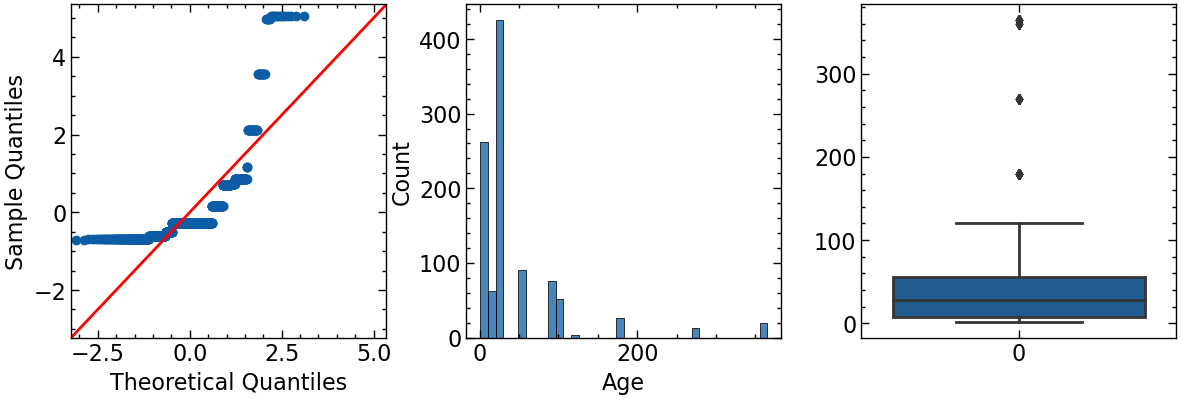

In [11]:
visualize_attribute(attr_index=7)

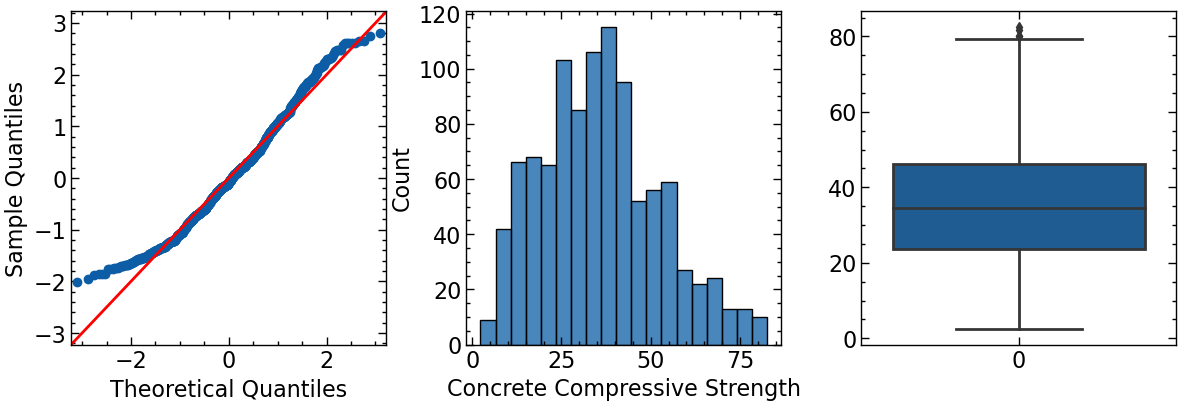

In [12]:
visualize_attribute(attr_index=8)

## Normality Test
The following code snippets below will conduct a normality check based on D'Agostino and Pearson's tests.
- **Null Hypothesis**: the dataset x comes from a normal distribution.
- **Alternate Hypothesis**: the dataset does not come from a normal distribution.

In [13]:
def conduct_normaltest(attr_index):
  cur_attribute = dataset.iloc[:, attr_index]
  return normaltest(cur_attribute)

attrs = dataset.columns
stats = []
ps = []

for index in range(0, dataset.shape[1]):
  stats.append(conduct_normaltest(index)[0])
  ps.append(conduct_normaltest(index)[1])

pd.DataFrame({
  "Attributes": attrs,
  "Statistic": stats,
  "P-Value": ps
})

,Attributes,Statistic,P-Value
0,Cement,61.766063,3.869634e-14
1,Blast Furnace Slag,107.600073,4.314605e-24
2,Fly Ash,3991.162348,0.000000e+00
3,Water,1.663222,4.353474e-01
4,Superplasticizer,140.502118,3.092806e-31
5,Coarse Aggregate,32.569233,8.466052e-08
6,Fine Aggregate,11.188767,3.718691e-03
7,Age,727.478896,1.071433e-158
8,Concrete Compressive Strength,33.646242,4.940959e-08


### Findings on the Normality Test
Based on the result of D'Agostino and Pearson's tests, only the water attribute is normally distributed. The rest of the attributes comes from a different distributions.

## Outlier Counts
The following snippets below counts all outliers on both ends of the distribution of each attributes.

> Based on the result of normality test, only the water component is normally distributed. The rest of the attributes comes from a non-normal distribution.

In [14]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Outliers less than 25th percentile
((dataset < (Q1 - 1.5 * IQR))).sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            5
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete Compressive Strength    0
dtype: int64

In [19]:
# Outliers greater than 25th percentile
(dataset > (Q3 + 1.5 * IQR)).sum()

Cement                            0
Blast Furnace Slag                2
Fly Ash                           0
Water                             4
Superplasticizer                 10
Coarse Aggregate                  0
Fine Aggregate                    5
Age                              59
Concrete Compressive Strength     4
dtype: int64

### Findings on Outlier Checks:
1. Only the water attribute have outliers below 25th percentile.
2. Age, Superplasticizer, Fine Aggregate, Water, Concrete Compressive Strength, and Blast furnace have outliers outside 75th percentile.

## Correlation Matrix
Finally, the following code snippets below shows the correlation matrix of each attributes.

<AxesSubplot:>

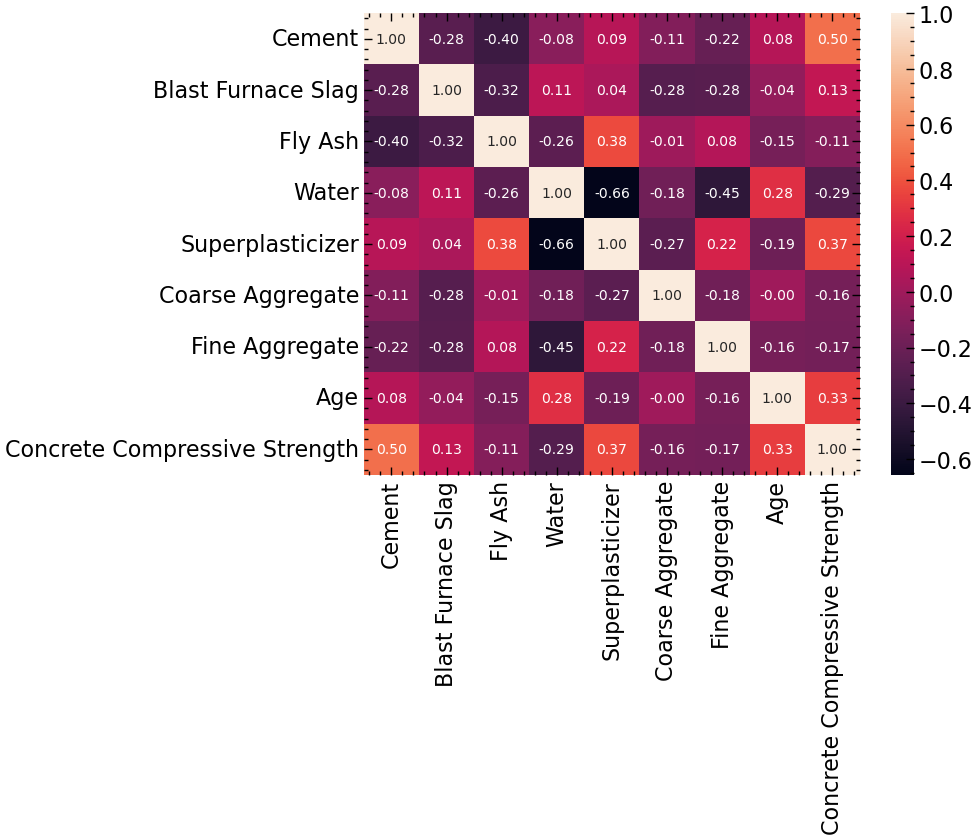

In [17]:
sns.heatmap(dataset.apply(zscore).corr(), annot=True, fmt=".2f")

### Findings on Correlation Matrix
Not considering interaction effects among the attributes, Cement, Superplasticizer, and Age were the most highly correlated with concrete compressive strength.

## Ending Note
Now that the dataset was explored and familiarized, machine learning preprocessing and modelling can be conducted.